<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/06_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training pipeline
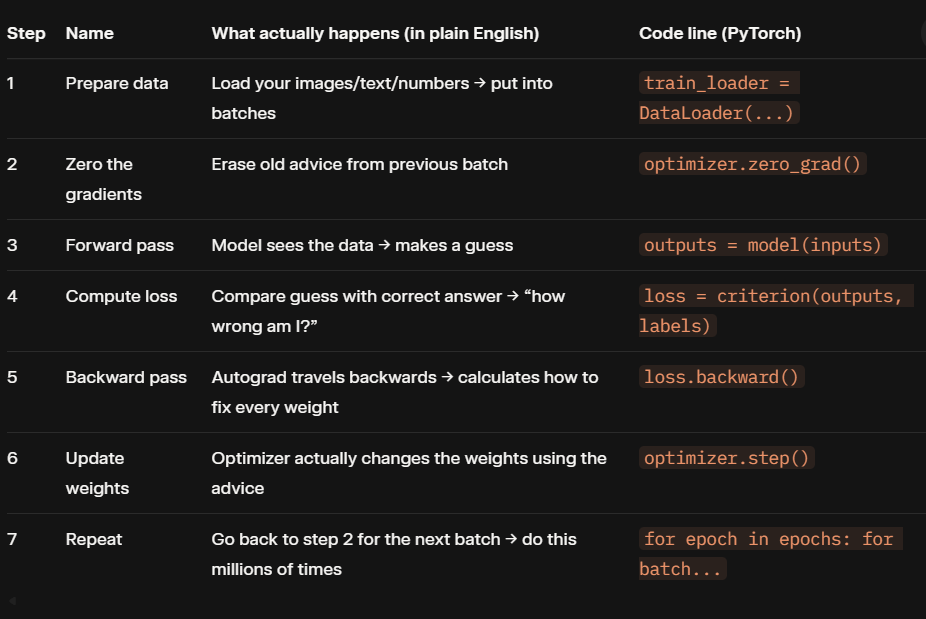

In [37]:
# 1) Design model(input,output size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

In [38]:
import torch
import torch.nn as nn


In [39]:
x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y=torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

x_test=torch.tensor([5],dtype=torch.float32)
n_samples,n_features=x.shape
print(n_samples,n_features)

4 1


In [40]:
input_size=n_features
output_size=n_features

# model=nn.Linear(input_size,output_size)

In [41]:
#perform same what above line of code was doing
class LinearRegression(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LinearRegression,self).__init__()
    # define layers
    self.lin=nn.Linear(input_dim,output_dim)

  def forward(self,x):
    return self.lin(x)

model=LinearRegression(input_size,output_size)

In [42]:
print(f'prediction before training:f(5)={model(x_test).item():.3f}')

prediction before training:f(5)=0.355


In [43]:
# Training

learning_rate=0.01
n_iters=100
loss=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
  #prediction = forward pass
  y_pred=model(x)

  #loss
  l=loss(y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  #update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10 ==0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}:w={w[0][0].item():.3f},loss={l:.8f}')

print(f'prediction after training:f(5)={model(x_test).item():.3f}')

epoch 1:w=0.557,loss=31.60148621
epoch 11:w=1.842,loss=0.82867330
epoch 21:w=2.046,loss=0.03186287
epoch 31:w=2.077,loss=0.01064081
epoch 41:w=2.080,loss=0.00952038
epoch 51:w=2.078,loss=0.00895325
epoch 61:w=2.076,loss=0.00843179
epoch 71:w=2.074,loss=0.00794099
epoch 81:w=2.072,loss=0.00747881
epoch 91:w=2.070,loss=0.00704348
prediction after training:f(5)=10.140
